# Perhitungan Skor RNN-IDS

## Import All Necessary Libraries

In [25]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math

## Load All the Data

In [26]:
df_pred = pd.read_csv('./result-bi-lstm-tcp25-hl2-seq3-do0.2-oov2500-combined-00025.pcap.csv', names=['id', 'binary_error', 'b_mean', 'b_iqr', 'b_zscore', 'floatin_error', 'f_mean', 'f_iqr', 'f_zscore'])
df_truth = pd.read_csv('../NUSW-NB15_GT.csv')

In [27]:
df_pred.head()

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore
0,175.45.176.0-40755-149.171.126.18-25-tcp,0.038403,0,1,1,37100.477876,0,1,1
1,175.45.176.0-60595-149.171.126.17-25-tcp,0.029308,0,1,1,24256.334766,0,1,1
2,175.45.176.2-58472-149.171.126.17-25-tcp,0.030318,0,1,1,31466.322630,0,1,1
3,175.45.176.2-13352-149.171.126.13-25-tcp,0.248199,0,1,1,241385.191011,0,1,1
4,175.45.176.0-3844-149.171.126.12-25-tcp,0.030066,0,1,1,26266.082933,0,1,1


In [28]:
df_truth.head()

,Start time,Last time,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.
0,1421927414,1421927416,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.
1,1421927415,1421927415,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.
2,1421927416,1421927416,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.
3,1421927417,1421927417,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.
4,1421927418,1421927418,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.


## Exploratory Data Analysis

In [29]:
df_pred[['b_iqr']].value_counts()

b_iqr
0        39499
1         5249
Name: count, dtype: int64

In [30]:
df_pred[['b_zscore']].value_counts()

b_zscore
0           39917
1            4831
Name: count, dtype: int64

In [31]:
df_truth.isnull().sum()

Start time                0
Last time                 0
Attack category           0
Attack subcategory     4097
Protocol                  0
Source IP                 0
Source Port               0
Destination IP            0
Destination Port          0
Attack Name               1
Attack Reference      50638
.                         0
dtype: int64

## Data Pre-Processing

### Convert the type of the data

In [32]:
df_truth['Source Port'] = df_truth['Source Port'].astype(int)
df_truth['Destination Port'] =df_truth['Destination Port'].astype(int)
df_truth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174347 entries, 0 to 174346
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Start time          174347 non-null  int64 
 1   Last time           174347 non-null  int64 
 2   Attack category     174347 non-null  object
 3   Attack subcategory  170250 non-null  object
 4   Protocol            174347 non-null  object
 5   Source IP           174347 non-null  object
 6   Source Port         174347 non-null  int64 
 7   Destination IP      174347 non-null  object
 8   Destination Port    174347 non-null  int64 
 9   Attack Name         174346 non-null  object
 10  Attack Reference    123709 non-null  object
 11  .                   174347 non-null  object
dtypes: int64(4), object(8)
memory usage: 16.0+ MB


In [33]:
df_truth['Source Port'] = df_truth['Source Port'].astype(str)
df_truth['Destination Port'] =df_truth['Destination Port'].astype(str)
df_truth['id'] = df_truth[['Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol']].apply("-".join, axis=1)

## Making Predictions

In [34]:
df_pred["predicted"] = np.where(df_pred["id"].isin(df_truth["id"]), 1, 0)

In [35]:
df_pred[df_pred['predicted']==1]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,predicted
10,175.45.176.2-30357-149.171.126.16-25-tcp,0.040041,0,1,1,38648.305870,0,1,1,1
46,175.45.176.0-21014-149.171.126.15-25-tcp,0.023497,0,1,1,22510.491277,0,1,1,1
70,175.45.176.1-53096-149.171.126.13-25-tcp,0.027539,0,1,1,22996.298609,0,1,1,1
73,175.45.176.1-13963-149.171.126.13-25-tcp,0.027034,0,1,1,21688.425790,0,1,1,1
79,175.45.176.3-37532-149.171.126.19-25-tcp,0.036129,0,1,1,30724.492541,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
44189,175.45.176.0-40991-149.171.126.11-25-tcp,0.027034,0,1,1,21836.518584,0,1,1,1
44201,175.45.176.2-43215-149.171.126.15-25-tcp,0.023244,0,1,1,19309.703413,0,1,1,1
44206,175.45.176.2-30290-149.171.126.13-25-tcp,0.026529,0,1,1,23815.996966,0,1,1,1
44213,175.45.176.2-28720-149.171.126.15-25-tcp,0.145141,0,1,1,103429.314815,0,1,1,1


In [36]:
df_pred[df_pred['predicted']==0]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,predicted
0,175.45.176.0-40755-149.171.126.18-25-tcp,0.038403,0,1,1,37100.477876,0,1,1,0
1,175.45.176.0-60595-149.171.126.17-25-tcp,0.029308,0,1,1,24256.334766,0,1,1,0
2,175.45.176.2-58472-149.171.126.17-25-tcp,0.030318,0,1,1,31466.322630,0,1,1,0
3,175.45.176.2-13352-149.171.126.13-25-tcp,0.248199,0,1,1,241385.191011,0,1,1,0
4,175.45.176.0-3844-149.171.126.12-25-tcp,0.030066,0,1,1,26266.082933,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
44743,59.166.0.9-21800-149.171.126.0-25-tcp,0.455028,0,0,0,381064.536030,0,0,0,0
44744,59.166.0.4-6591-149.171.126.6-25-tcp,0.480798,0,0,0,396309.425032,0,0,0,0
44745,59.166.0.5-7481-149.171.126.2-25-tcp,0.480798,0,0,0,396309.425032,0,0,0,0
44746,59.166.0.0-12790-149.171.126.2-25-tcp,0.480798,0,0,0,396309.425032,0,0,0,0


In [37]:
df_pred

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,predicted
0,175.45.176.0-40755-149.171.126.18-25-tcp,0.038403,0,1,1,37100.477876,0,1,1,0
1,175.45.176.0-60595-149.171.126.17-25-tcp,0.029308,0,1,1,24256.334766,0,1,1,0
2,175.45.176.2-58472-149.171.126.17-25-tcp,0.030318,0,1,1,31466.322630,0,1,1,0
3,175.45.176.2-13352-149.171.126.13-25-tcp,0.248199,0,1,1,241385.191011,0,1,1,0
4,175.45.176.0-3844-149.171.126.12-25-tcp,0.030066,0,1,1,26266.082933,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
44743,59.166.0.9-21800-149.171.126.0-25-tcp,0.455028,0,0,0,381064.536030,0,0,0,0
44744,59.166.0.4-6591-149.171.126.6-25-tcp,0.480798,0,0,0,396309.425032,0,0,0,0
44745,59.166.0.5-7481-149.171.126.2-25-tcp,0.480798,0,0,0,396309.425032,0,0,0,0
44746,59.166.0.0-12790-149.171.126.2-25-tcp,0.480798,0,0,0,396309.425032,0,0,0,0


In [38]:
df_pred[['predicted']].value_counts()

predicted
0            40696
1             4052
Name: count, dtype: int64

In [39]:
df_temp = df_pred[['id', 'b_mean','b_iqr', 'b_zscore', 'f_zscore', 'f_mean','f_iqr' ]]
df_temp.to_csv('../mcnemar/smtp/bi-lstm_pred_0.0.csv')

## Calculating Score

In [40]:
threshold = ['b_mean', 'b_iqr', 'b_zscore']
threshold_2 = ['f_mean', 'f_iqr', 'f_zscore']

methods = ['binary', 'floating']

In [41]:
df_pred[['b_zscore']]

,b_zscore
0,1
1,1
2,1
3,1
4,1
...,...
44743,0
44744,0
44745,0
44746,0


### Detection Rate

In [42]:
from sklearn.metrics import recall_score

score = dict()
score['Detection Rate'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = recall_score(df_pred['predicted'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = recall_score(df_pred['predicted'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Floating-{i}: {acc}')  

Recall-Binary-b_mean: 0.0027147087857847976
Recall-Binary-b_iqr: 0.998025666337611
Recall-Binary-b_zscore: 0.998025666337611
Recall-Floating-f_mean: 0.008144126357354392
Recall-Floating-f_iqr: 0.9940769990128332
Recall-Floating-f_zscore: 0.9921026653504442


In [43]:
from sklearn.metrics import accuracy_score

score['Accuracy Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = accuracy_score(df_pred['predicted'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = accuracy_score(df_pred['predicted'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Floating-{i}: {acc}')  

Accuracy-Binary-b_mean: 0.908264056494145
Accuracy-Binary-b_iqr: 0.9728926432466255
Accuracy-Binary-b_zscore: 0.9822338428533118
Accuracy-Floating-f_mean: 0.9079288459819433
Accuracy-Floating-f_iqr: 0.9860552426924108
Accuracy-Floating-f_zscore: 0.9881335478680612


### Confussion Matrix

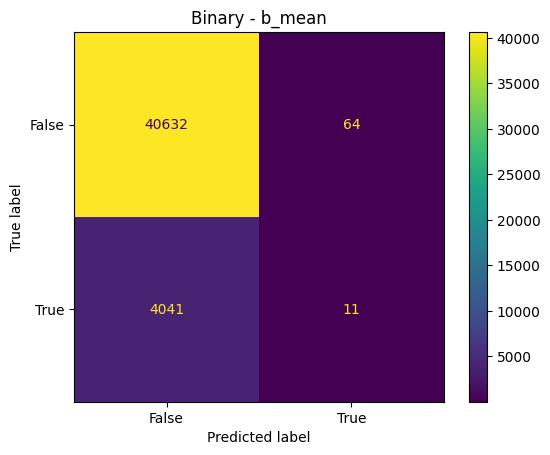

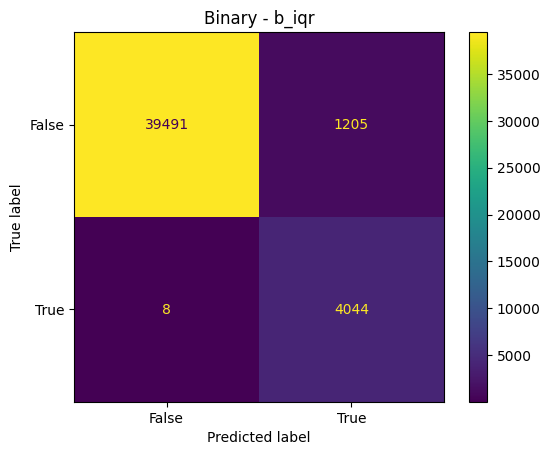

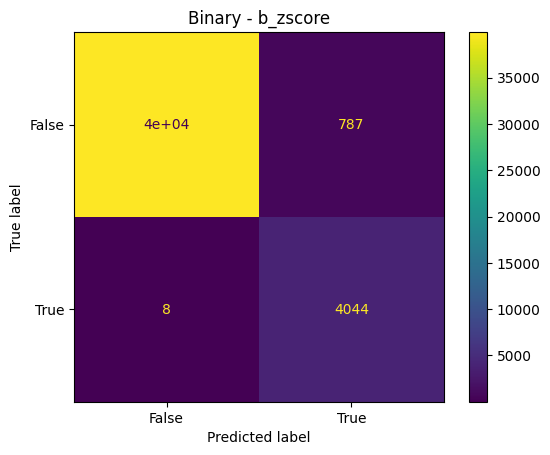

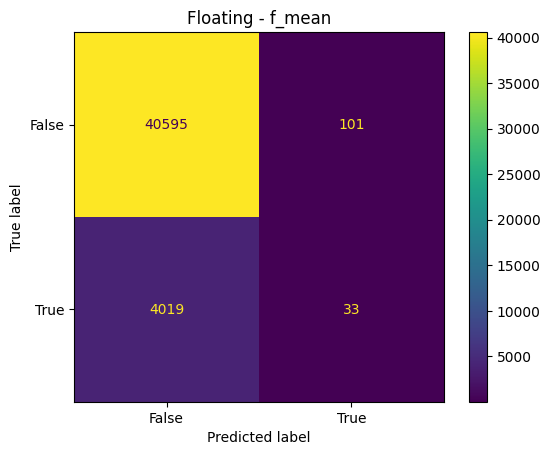

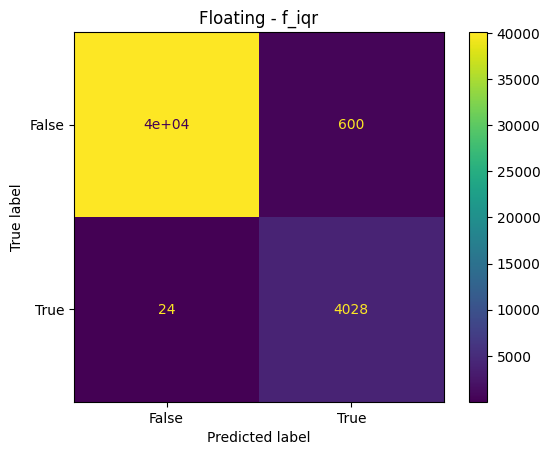

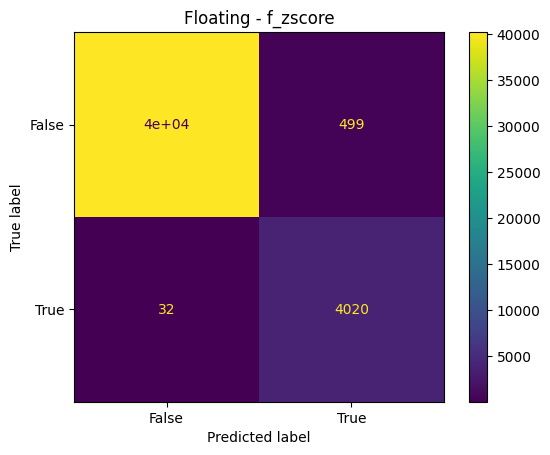

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

for method in methods:
    if method == 'binary':
        for i in threshold:
            conf_matrix = confusion_matrix(df_pred['predicted'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
            cm_display.plot()
            plt.title(f'Binary - {i.strip()}')
            plt.show()
    else:
        for i in threshold_2:
            conf_matrix = confusion_matrix(df_pred['predicted'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
            cm_display.plot()
            plt.title(f'Floating - {i.strip()}')
            plt.show()


### F2-Score

In [45]:
score['F2 Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['predicted'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Binary-{i}: {f2}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['predicted'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Floating-{i}: {f2}')

F2-Binary-b_mean: 0.00337775594177977
F2-Binary-b_iqr: 0.9423498159108915
F2-Binary-b_zscore: 0.9610722943105661
F2-Floating-f_mean: 0.010096683392485619
F2-Floating-f_iqr: 0.9665962756767134
F2-Floating-f_zscore: 0.969749601968447


### FPR Score

In [46]:
score['FPR Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['predicted'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Binary-{i}: {fpr}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['predicted'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Floating-{i}: {fpr}')

FPR-Binary-b_mean: 0.001572636131315117
FPR-Binary-b_iqr: 0.029609789659917438
FPR-Binary-b_zscore: 0.01933850992726558
FPR-Floating-f_mean: 0.0024818163947316688
FPR-Floating-f_iqr: 0.014743463731079222
FPR-Floating-f_zscore: 0.012261647336347553


In [47]:
df_score = pd.DataFrame.from_dict(score)
df_score

,Detection Rate,Accuracy Score,F2 Score,FPR Score
b_mean,0.002715,0.908264,0.003378,0.001573
b_iqr,0.998026,0.972893,0.942350,0.029610
b_zscore,0.998026,0.982234,0.961072,0.019339
f_mean,0.008144,0.907929,0.010097,0.002482
f_iqr,0.994077,0.986055,0.966596,0.014743
f_zscore,0.992103,0.988134,0.969750,0.012262


In [48]:
df_score.to_excel('score_bi-lstm_smtp_0.0.xlsx')